In [ ]:
# STEP 1: Upload the Excel file
from google.colab import files
uploaded = files.upload()

Saving BADM590ProjectData.xlsx to BADM590ProjectData.xlsx


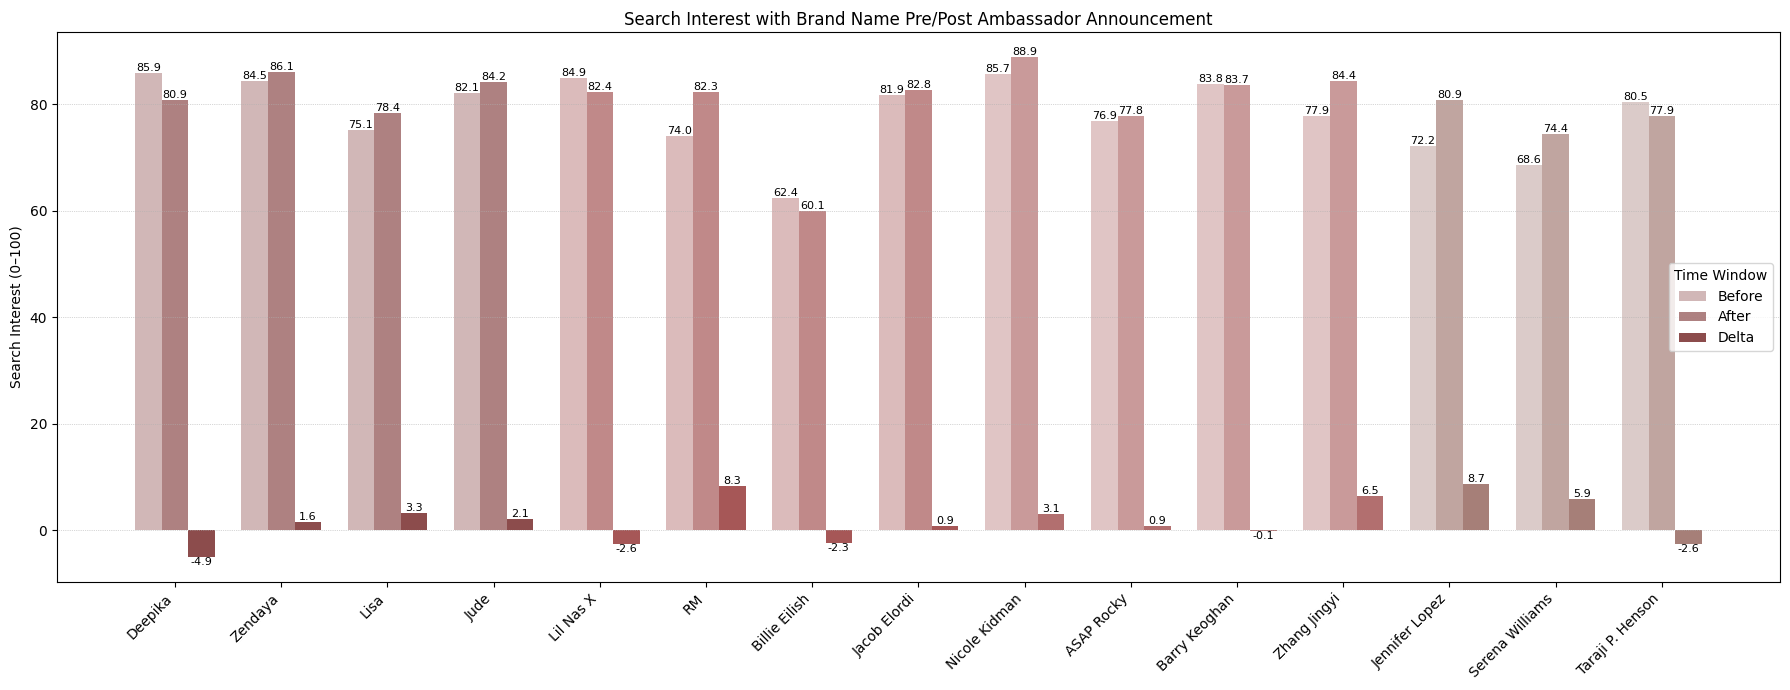

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === STEP 1: Load Excel ===
file_name = "BADM590ProjectData.xlsx"
df = pd.read_excel(file_name, sheet_name='ST-BrandName')

# === STEP 2: Prepare Data ===
ambassadors = ['Deepika', 'Zendaya', 'Lisa', 'Jude',
               'Lil Nas X', 'RM', 'Billie Eilish', 'Jacob Elordi',
               'Nicole Kidman', 'ASAP Rocky', 'Barry Keoghan', 'Zhang Jingyi',
               'Jennifer Lopez', 'Serena Williams', 'Taraji P. Henson']
df = df[['Dates'] + ambassadors].dropna(subset=['Dates'])
df['Dates'] = df['Dates'].astype(int)

# === STEP 3: Brand groupings and colors ===
brand_groups = [
    ['Deepika', 'Zendaya', 'Lisa', 'Jude'],                   # Louis Vuitton
    ['Lil Nas X', 'RM', 'Billie Eilish', 'Jacob Elordi'],     # Kering
    ['Nicole Kidman', 'ASAP Rocky', 'Barry Keoghan', 'Zhang Jingyi'],  # Moncler/Burberry
    ['Jennifer Lopez', 'Serena Williams', 'Taraji P. Henson']           # Tapestry
]
brand_names = ['Louis Vuitton', 'Kering', 'Moncler/Burberry', 'Tapestry']
brand_colors = ["#8c4c4c", "#a65757", "#b26f6f", "#a67f78"]

# === STEP 4: Flatten groups ===
all_ambs = []
before_vals, after_vals, delta_vals, colors = [], [], [], []

for group, color in zip(brand_groups, brand_colors):
    before = df[df['Dates'] < 0][group].mean()
    after = df[df['Dates'] > 0][group].mean()
    delta = after - before

    all_ambs.extend(group)
    before_vals.extend(before.values)
    after_vals.extend(after.values)
    delta_vals.extend(delta.values)
    colors.extend([color] * len(group))

# === STEP 5: Plot one single grouped bar chart ===
x = np.arange(len(all_ambs))
width = 0.25

fig, ax = plt.subplots(figsize=(18, 7))
bar1 = ax.bar(x - width, before_vals, width, label='Before', color=colors, alpha=0.4)
bar2 = ax.bar(x, after_vals, width, label='After', color=colors, alpha=0.7)
bar3 = ax.bar(x + width, delta_vals, width, label='Delta', color=colors, alpha=1.0)

# Add value labels
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}',
                ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(all_ambs, rotation=45, ha='right')
ax.set_title("Search Interest with Brand Name Pre/Post Ambassador Announcement")
ax.set_ylabel("Search Interest (0–100)")
ax.legend(title="Time Window")
ax.grid(axis='y', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

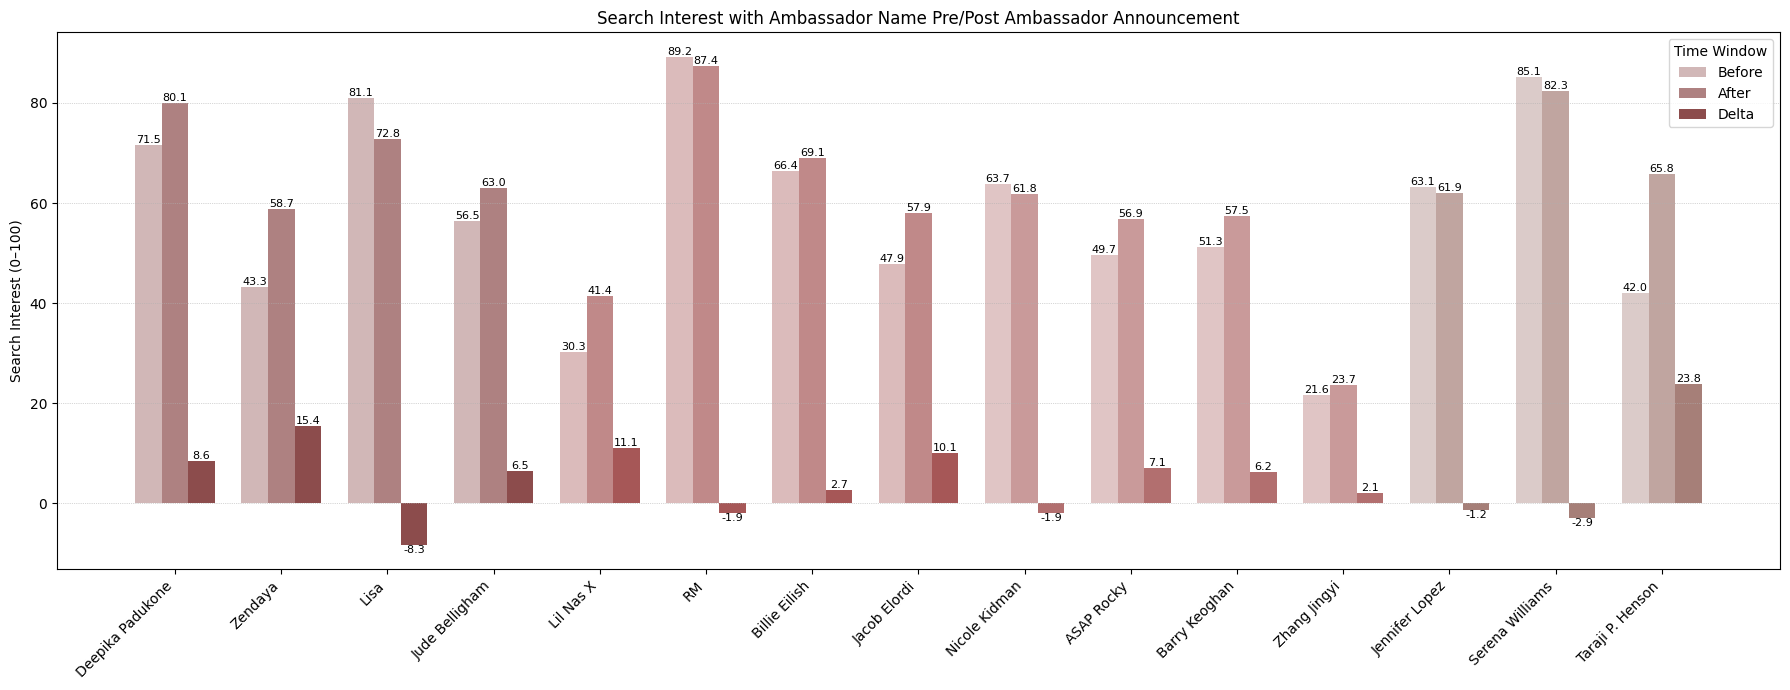

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === STEP 1: Load from ST_Amb sheet ===
file_name = "BADM590ProjectData.xlsx"
df = pd.read_excel(file_name, sheet_name='ST_Amb')

# === STEP 2: Clean Columns ===
ambassadors = ['Deepika Padukone', 'Zendaya', 'Lisa', 'Jude Belligham',
               'Lil Nas X', 'RM', 'Billie Eilish', 'Jacob Elordi',
               'Nicole Kidman', 'ASAP Rocky', 'Barry Keoghan', 'Zhang Jingyi',
               'Jennifer Lopez', 'Serena Williams', 'Taraji P. Henson']
df = df[['Dates'] + ambassadors].dropna(subset=['Dates'])
df['Dates'] = df['Dates'].astype(int)

# === STEP 3: Brand grouping and single pink tone per brand ===
groups = [
    ['Deepika Padukone', 'Zendaya', 'Lisa', 'Jude Belligham'],                   # Louis Vuitton
    ['Lil Nas X', 'RM', 'Billie Eilish', 'Jacob Elordi'],                        # Kering
    ['Nicole Kidman', 'ASAP Rocky', 'Barry Keoghan', 'Zhang Jingyi'],           # Moncler/Burberry
    ['Jennifer Lopez', 'Serena Williams', 'Taraji P. Henson']                   # Tapestry
]
brand_names = ['Louis Vuitton', 'Kering', 'Moncler/Burberry', 'Tapestry']
brand_colors = ["#8c4c4c", "#a65757", "#b26f6f", "#a67f78"]

# === STEP 4: Flatten brand groups into one chart ===
all_ambs = []
before_vals, after_vals, delta_vals, colors = [], [], [], []

for group, color in zip(groups, brand_colors):
    before = df[df['Dates'] < 0][group].mean()
    after = df[df['Dates'] > 0][group].mean()
    delta = after - before

    all_ambs.extend(group)
    before_vals.extend(before.values)
    after_vals.extend(after.values)
    delta_vals.extend(delta.values)
    colors.extend([color] * len(group))

# === STEP 5: Plot all ambassadors (one chart with 3 bars each) ===
x = np.arange(len(all_ambs))
width = 0.25

fig, ax = plt.subplots(figsize=(18, 7))
bar1 = ax.bar(x - width, before_vals, width, label='Before', color=colors, alpha=0.4)
bar2 = ax.bar(x, after_vals, width, label='After', color=colors, alpha=0.7)
bar3 = ax.bar(x + width, delta_vals, width, label='Delta', color=colors, alpha=1.0)

# Add labels on bars
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}',
                ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)

# Final formatting
ax.set_xticks(x)
ax.set_xticklabels(all_ambs, rotation=45, ha='right')
ax.set_title("Search Interest with Ambassador Name Pre/Post Ambassador Announcement")
ax.set_ylabel("Search Interest (0–100)")
ax.legend(title="Time Window")
ax.grid(axis='y', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()


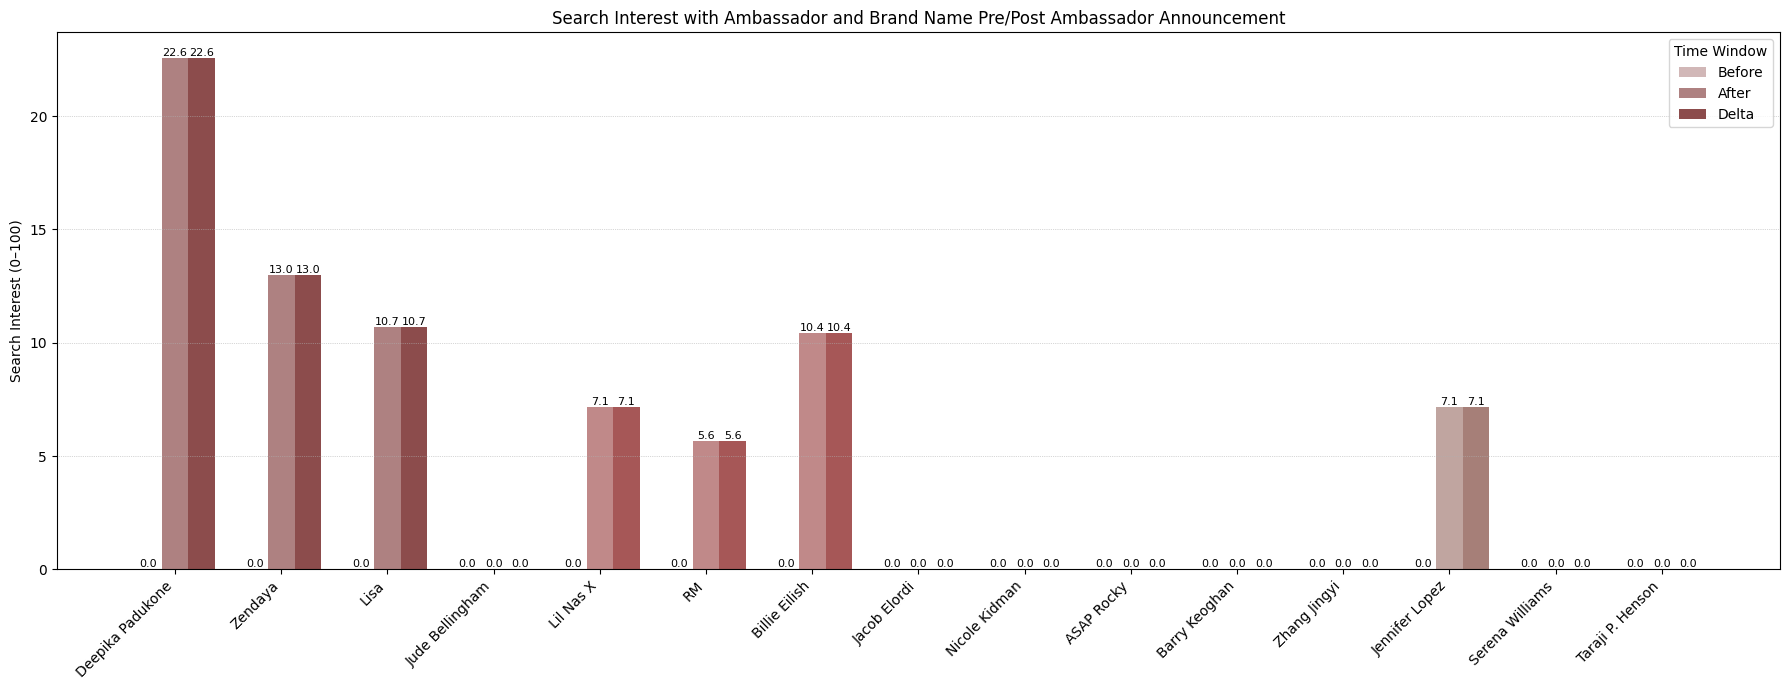

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === STEP 1: Load from ST_Amb sheet ===
file_name = "BADM590ProjectData.xlsx"
df = pd.read_excel(file_name, sheet_name='ST_Amb_Brand')

# === STEP 2: Clean Columns ===
ambassadors = ['Deepika Padukone', 'Zendaya', 'Lisa', 'Jude Bellingham',
               'Lil Nas X', 'RM', 'Billie Eilish', 'Jacob Elordi',
               'Nicole Kidman', 'ASAP Rocky', 'Barry Keoghan', 'Zhang Jingyi',
               'Jennifer Lopez', 'Serena Williams', 'Taraji P. Henson']
df = df[['Dates'] + ambassadors].dropna(subset=['Dates'])
df['Dates'] = df['Dates'].astype(int)

# === STEP 3: Brand grouping and single pink tone per brand ===
groups = [
    ['Deepika Padukone', 'Zendaya', 'Lisa', 'Jude Bellingham'],                   # Louis Vuitton
    ['Lil Nas X', 'RM', 'Billie Eilish', 'Jacob Elordi'],                        # Kering
    ['Nicole Kidman', 'ASAP Rocky', 'Barry Keoghan', 'Zhang Jingyi'],           # Moncler/Burberry
    ['Jennifer Lopez', 'Serena Williams', 'Taraji P. Henson']                   # Tapestry
]
brand_names = ['Louis Vuitton', 'Kering', 'Moncler/Burberry', 'Tapestry']
brand_colors = ["#8c4c4c", "#a65757", "#b26f6f", "#a67f78"]

# === STEP 4: Flatten brand groups into one chart ===
all_ambs = []
before_vals, after_vals, delta_vals, colors = [], [], [], []

for group, color in zip(groups, brand_colors):
    before = df[df['Dates'] < 0][group].mean()
    after = df[df['Dates'] > 0][group].mean()
    delta = after - before

    all_ambs.extend(group)
    before_vals.extend(before.values)
    after_vals.extend(after.values)
    delta_vals.extend(delta.values)
    colors.extend([color] * len(group))

# === STEP 5: Plot all ambassadors (one chart with 3 bars each) ===
x = np.arange(len(all_ambs))
width = 0.25

fig, ax = plt.subplots(figsize=(18, 7))
bar1 = ax.bar(x - width, before_vals, width, label='Before', color=colors, alpha=0.4)
bar2 = ax.bar(x, after_vals, width, label='After', color=colors, alpha=0.7)
bar3 = ax.bar(x + width, delta_vals, width, label='Delta', color=colors, alpha=1.0)

# Add labels on bars
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}',
                ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)

# Final formatting
ax.set_xticks(x)
ax.set_xticklabels(all_ambs, rotation=45, ha='right')
ax.set_title("Search Interest with Ambassador and Brand Name Pre/Post Ambassador Announcement")
ax.set_ylabel("Search Interest (0–100)")
ax.legend(title="Time Window")
ax.grid(axis='y', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()